In [2]:
import numpy as np
import pandas as pd
import os
import pickle
import sys
import scipy.stats as stats
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
os.getcwd()
os.listdir()

['.Rhistory',
 'js1_bi.csv',
 'Bipartite_graph.ipynb',
 'Junction_Sequences_NTRK1_nonCRC_4_19_20_deid.xlsx',
 'Table1.rds',
 'Fusion_Gene.ipynb',
 'Fusion_Gene_nonCRC.ipynb',
 'Junction_Sequences_CRC_4_19_20_deid.xlsx',
 'js1_count.pkl',
 '.RData',
 'Table1.pkl',
 '.ipynb_checkpoints',
 'Fusion_Gene_R.ipynb',
 'Fusion_Gene_R.R']

# A glance at data

In [14]:
file = 'Junction_Sequences_NTRK1_nonCRC_4_19_20_deid.xlsx'
df = pd.read_excel(file)

with open('nonCRC_Table1.pkl', 'wb') as f: # save pickle
    pickle.dump(df, f)
    f.close()

In [3]:
with open('nonCRC_Table1.pkl', 'rb') as f: # load pickle
    df = pickle.load(f)
    f.close()
df

,deidentifiedSpecimenName,diseaseOntology,MSIstatus,gene1_RE,gene2_RE,Gene1_Breakpoint1,Gene2_Breakpoint1,Junction Sequence 1,Gene1_Breakpoint2,Gene2_Breakpoint2,Junction Sequence 2
0,XRN:5H19TB,breast carcinoma (nos),MSS,NTRK1,LMNA,chr1:156844991,chr1:156109619,GGGAATGAGGTGGGAGGTGGAAGAAGGGAGAAGAAAGGTGAGTTTG...,-,-,-
1,XRN:67DD1N,brain glioblastoma (gbm),MSS,NTRK1,BCAN,chr1:156844548,chr1:156629350,TATGAGCCCAGGCAAGTTGGATGCTTCTGTGTGTATGTCCGTGACA...,-,-,-
2,XRN:8PFVJK,lung adenocarcinoma,MSS,NTRK1,TFG,chr1:156843796,chr3:100450467,TTACACTATACACATTTCCGCCCCTCCTGTTACCCAGAGTGGAGTA...,-,-,-
3,XRN:2AUNEA,breast carcinoma (nos),MSS,NTRK1,TPM3,chr1:156844354,chr1:154139659,TACTTTTTCTTCTTTAAACCTTTCTTACATATTTGAGACTTGCTAC...,-,-,-
4,XRN:L6E0XT,unknown primary adenocarcinoma,MSI-H,NTRK1,LMNA,chr1:156845528,chr1:156109315,CAAGGGCAGGGACGAGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTG...,-,-,-
5,XRN:TM9UPK,unknown primary adenocarcinoma,MSI-H,NTRK1,TPM3,chr1:156843585,chr1:154141825,GTGCTCAATGAGACCAGCTTCATCTTCACTGAGTTCCTGGAGCCGG...,chr1:156843585,chr1:154141832,TGTGGTTCCTGTGCCTGTCCAGATGAGCTCTATGCCCAGAAACTGA...
6,XRN:HK7AJD,small intestine neuroendocrine carcinoma,MSI-H,NTRK1,TPM3,chr1:156844852,chr1:154138492,TCTAGGTATAGGATATTAAGATGGAGACAGAAATAAAGATGGAGGC...,chr1:156844859,chr1:154138483,GGGCTGCAGAGGGCTGTCTGTCTGTCTGTTCTCCTGGCTTTGTTTC...
7,XRN:SM992B,lung adenocarcinoma,MSS,NTRK1,IRF2BP2,chr1:156844259,chr1:234743316,GGAGGGCAGGTTCTGCCTGGTCTCTGGAGCTGAGGCTGGGGCAGAG...,-,-,-
8,XRN:9HSYN1,brain medulloblastoma,MSS,NTRK1,MTA1,chr1:156843272,chr14:105935790,TGCCTGATTTATTTAAAATGTATTGTCAACTTTCTTCAAAACATCT...,-,-,-
9,XRN:9F7FQH,lung sarcomatoid carcinoma,MSS,NTRK1,NLGN1,chr1:156842275,chr3:173545781,GTACATTATATAAATGGAATCATACTGCGTGTATTATTTTGTATCT...,-,-,-


In [3]:
df.describe().T # default describe of a table

,count,unique,top,freq
deidentifiedSpecimenName,112,112,XRN:6XV1TC,1
diseaseOntology,112,35,lung adenocarcinoma,21
MSIstatus,112,2,MSS,109
gene1_RE,112,1,NTRK1,112
gene2_RE,112,41,TPM3,31
Gene1_Breakpoint1,112,107,chr1:156845528,4
Gene2_Breakpoint1,112,112,chr1:35650140,1
Junction Sequence 1,112,112,CATTCCATTATTTATTTATTTTTCTCTTTTTGAGATGGAGTCTCGC...,1
Gene1_Breakpoint2,112,34,-,76
Gene2_Breakpoint2,112,37,-,76


In [10]:
print(df.diseaseOntology.nunique(), df.diseaseOntology.unique()) # to see what's in diseaseOntology

35 ['breast carcinoma (nos)' 'brain glioblastoma (gbm)' 'lung adenocarcinoma'
 'unknown primary adenocarcinoma'
 'small intestine neuroendocrine carcinoma' 'brain medulloblastoma'
 'lung sarcomatoid carcinoma'
 'lung non-small cell lung carcinoma (nsclc) (nos)'
 'unknown primary urothelial carcinoma' 'ovary epithelial carcinoma'
 'bladder urothelial (transitional cell) carcinoma'
 'ovary serous carcinoma' 'brain anaplastic astrocytoma'
 'unknown primary neuroendocrine tumor' 'pancreas acinar cell carcinoma'
 'thyroid papillary carcinoma' 'ovary carcinosarcoma'
 'uterus endometrial adenocarcinoma papillary serous'
 'unknown primary serous carcinoma' 'prostate acinar adenocarcinoma'
 'pancreas ductal adenocarcinoma' 'spine glioma (nos)'
 'breast invasive ductal carcinoma (idc)' 'thyroid anaplastic carcinoma'
 'unknown primary melanoma' 'brain astrocytoma pilocytic'
 'brain pleomorphic xanthoastrocytoma' 'liver cholangiocarcinoma'
 'skin melanoma' 'adrenal gland cortical carcinoma'
 'live

In [5]:
values, counts = np.unique(df.MSIstatus, return_counts=True) # count MSIstatus
dict(zip(values, counts))

{'MSI-H': 3, 'MSS': 109}

In [4]:
values, counts = np.unique(df.diseaseOntology, return_counts=True) # count diseaseOntology items
Ontoloty_count = dict(zip(values, counts))
Ontoloty_count

{'adrenal gland cortical carcinoma': 1,
 'bladder urothelial (transitional cell) carcinoma': 1,
 'brain anaplastic astrocytoma': 1,
 'brain astrocytoma pilocytic': 2,
 'brain glioblastoma (gbm)': 14,
 'brain medulloblastoma': 1,
 'brain pleomorphic xanthoastrocytoma': 1,
 'breast carcinoma (nos)': 4,
 'breast invasive ductal carcinoma (idc)': 5,
 'liver cholangiocarcinoma': 1,
 'liver hepatocellular carcinoma (hcc)': 1,
 'lung adenocarcinoma': 21,
 'lung non-small cell lung carcinoma (nsclc) (nos)': 5,
 'lung sarcomatoid carcinoma': 1,
 'ovary carcinosarcoma': 1,
 'ovary epithelial carcinoma': 1,
 'ovary serous carcinoma': 4,
 'pancreas acinar cell carcinoma': 1,
 'pancreas ductal adenocarcinoma': 5,
 'prostate acinar adenocarcinoma': 1,
 'skin melanoma': 1,
 'small intestine neuroendocrine carcinoma': 1,
 'spine glioma (nos)': 1,
 'thyroid anaplastic carcinoma': 2,
 'thyroid carcinoma (nos)': 1,
 'thyroid follicular carcinoma': 1,
 'thyroid papillary carcinoma': 20,
 'unknown primary 

In [13]:
values, counts = np.unique(df.gene2_RE, return_counts=True) # count Gene2 items
#gene2_RE_count = dict(zip(values, counts))

In [14]:
pd.DataFrame([values, counts], index=['gene2_RE','count']).T.sort_values('count', ascending=False)

,gene2_RE,count
37,TPM3,31
39,TPR,15
19,LMNA,9
16,IRF2BP2,9
4,BCAN,4
25,PEAR1,3
33,SQSTM1,3
13,ERC1,3
2,ARHGEF11,2
35,TFG,2


# Hypothesis1

### check nucleotide specificity in Junction Sequence 1

In [6]:
js1 = df[['Junction Sequence 1','MSIstatus']]
js1.index = df['deidentifiedSpecimenName']
js1.head()

,Junction Sequence 1,MSIstatus
deidentifiedSpecimenName,,
XRN:5H19TB,GGGAATGAGGTGGGAGGTGGAAGAAGGGAGAAGAAAGGTGAGTTTG...,MSS
XRN:67DD1N,TATGAGCCCAGGCAAGTTGGATGCTTCTGTGTGTATGTCCGTGACA...,MSS
XRN:8PFVJK,TTACACTATACACATTTCCGCCCCTCCTGTTACCCAGAGTGGAGTA...,MSS
XRN:2AUNEA,TACTTTTTCTTCTTTAAACCTTTCTTACATATTTGAGACTTGCTAC...,MSS
XRN:L6E0XT,CAAGGGCAGGGACGAGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTG...,MSI-H


In [8]:
values, counts = np.unique(js1.MSIstatus, return_counts=True)
dict(zip(values, counts))

{'MSI-H': 3, 'MSS': 109}

In [9]:
def cound_mononucleotide(i):
    A_ct = i.count('A') + i.count('a')
    T_ct = i.count('T') + i.count('t')
    C_ct = i.count('C') + i.count('c')
    G_ct = i.count('G') + i.count('g')
    tmp = {'A':A_ct, 'T':T_ct, 'C':C_ct,'G':G_ct}
    return tmp
def count_mono_series(indexed):
    save = {}
    for i in range(len(indexed)):
        save[indexed.index[i]] = cound_mononucleotide(indexed[i])
    return save

def cound_binucleotide(str):
    list = ['A','T','C','G']
    tmp = {}
    for i in list:
        for j in list:
            key = i+j
            tmp[key] = str.count(key)
    return tmp
def count_bi_series(indexed):
    save = {}
    for i in range(len(indexed)):
        save[indexed.index[i]] = cound_binucleotide(indexed[i])
    return save

def my_referse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(complement.get(base, base) for base in reversed(seq))

#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
def combine_rc_table(df):
    cols_rest = list(df.columns)
    cols_1 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)       
    dt = pd.DataFrame()
    for i in cols_1:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in df.columns:
            dt[i+"+"+reverse_tmp] = df[i]+df[reverse_tmp]         
    dt = pd.concat([dt, df[cols_rest]], axis=1)       
    return dt


def combine_rc_table2(dg):
    df = dg.copy()
    #df['count'] = df.sum(axis=1)
    cols_rest = list(df.columns)
    cols_1 = []
    cols_2 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)
                cols_2.append(reverse_tmp)   
    dt = pd.DataFrame()
    #cols_c = []
    for i,j in zip(cols_1,cols_2):
        if i==j:
            #cols_c.append(i)
            dt[i] = df[i]
        else:
            k = i+"+"+j
            #cols_c.append(k)
            dt[k] = (df[i]+df[j])        
    dt = pd.concat([dt, df[cols_rest]], axis=1)
    return dt


def combine_rc_percentage(dg):
    df = dg.copy()
    df['count'] = df.sum(axis=1)
    cols_rest = list(df.columns)
    cols_1 = []
    cols_2 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)
                cols_2.append(reverse_tmp)   
    dt = pd.DataFrame()
    #cols_c = []
    for i,j in zip(cols_1,cols_2):
        if i==j:
            #cols_c.append(i)
            dt[i] = df[i]/df['count']
        else:
            k = i+"+"+j
            #cols_c.append(k)
            dt[k] = (df[i]+df[j])/df['count']           
    dt = pd.concat([dt, df[cols_rest]], axis=1)
    return dt

def mean_mannwhitneyu(df):
    gb = df.groupby('MSIstatus')
    tmp = gb.agg('mean').T # compute mean
    tmp.rename(columns={"MSI-H":'MSI_mean',"MSS":'MSS_mean'}, inplace = True)
    msi = gb.get_group('MSI-H')
    mss = gb.get_group('MSS')
    p_list = []
    for i in tmp.index:
        stat, pval = stats.mannwhitneyu(msi[i], mss[i]) # compute p value
        p_list.append(pval)
    tmp['MW_2tailed_pval'] = p_list
    return tmp

In [8]:
js1_mono_count = count_mono_series(js1.iloc[:,0])
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
js1_mono_df = pd.concat([pd.DataFrame(js1_mono_count).T, js1['MSIstatus']], axis=1)
js1_mono_df.head()

,A,C,G,T,MSIstatus
deidentifiedSpecimenName,,,,,
XRN:5H19TB,23,8,46,20,MSS
XRN:67DD1N,20,22,35,20,MSS
XRN:8PFVJK,25,32,18,26,MSS
XRN:2AUNEA,28,25,16,31,MSS
XRN:L6E0XT,13,21,49,31,MSI-H


In [22]:
js1_mono = combine_rc_table(js1_mono_df)
js1_mono_p = combine_rc_percentage(js1_mono_df)
#js1_mono = js1_mono[js1_mono['MSIstatus']!='MSI ambiguous']
js1_mono.head()

,A+T,C+G,MSIstatus
deidentifiedSpecimenName,,,
XRN:5H19TB,43,54,MSS
XRN:67DD1N,40,57,MSS
XRN:8PFVJK,51,50,MSS
XRN:2AUNEA,59,41,MSS
XRN:L6E0XT,44,70,MSI-H


In [12]:
js1_GC = js1_mono_df.iloc[:]
js1_GC['GC_content'] = (js1_GC['C'] + js1_GC['G']) / (js1_GC['A'] + js1_GC['T'] + js1_GC['C'] + js1_GC['G'])
js1_GC.head()

,A,C,G,T,MSIstatus,GC_content
deidentifiedSpecimenName,,,,,,
XRN:5H19TB,23,8,46,20,MSS,0.556701
XRN:67DD1N,20,22,35,20,MSS,0.587629
XRN:8PFVJK,25,32,18,26,MSS,0.495050
XRN:2AUNEA,28,25,16,31,MSS,0.410000
XRN:L6E0XT,13,21,49,31,MSI-H,0.614035


In [13]:
dt_mono = js1_mono.groupby('MSIstatus') \
    .agg({"A+T":'mean',"C+G":'mean'})\
    .rename(columns={'A+T':'A+T mean','C+G':'C+G mean'})#.reset_index()
dt_mono.T

MSIstatus,MSI-H,MSS
A+T mean,47.333333,48.284404
C+G mean,57.666667,52.568807


### new way to count percentage

In [23]:
def combine_rc_table2(dg):
    df = dg.copy()
    #df['count'] = df.sum(axis=1)
    cols_rest = list(df.columns)
    cols_1 = []
    cols_2 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)
                cols_2.append(reverse_tmp)   
    dt = pd.DataFrame()
    #cols_c = []
    for i,j in zip(cols_1,cols_2):
        if i==j:
            #cols_c.append(i)
            dt[i] = df[i]
        else:
            k = i+"+"+j
            #cols_c.append(k)
            dt[k] = (df[i]+df[j])        
    dt = pd.concat([dt, df[cols_rest]], axis=1)
    return dt

In [15]:
combine_rc_table2(js1_mono_df).head(3)

,A+T,C+G,MSIstatus
deidentifiedSpecimenName,,,
XRN:5H19TB,43,54,MSS
XRN:67DD1N,40,57,MSS
XRN:8PFVJK,51,50,MSS


In [24]:
def combine_rc_percentage(dg):
    df = dg.copy()
    df['count'] = df.sum(axis=1)
    cols_rest = list(df.columns)
    cols_1 = []
    cols_2 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)
                cols_2.append(reverse_tmp)   
    dt = pd.DataFrame()
    #cols_c = []
    for i,j in zip(cols_1,cols_2):
        if i==j:
            #cols_c.append(i)
            dt[i] = df[i]/df['count']
        else:
            k = i+"+"+j
            #cols_c.append(k)
            dt[k] = (df[i]+df[j])/df['count']           
    dt = pd.concat([dt, df[cols_rest]], axis=1)
    return dt

In [26]:
combine_rc_percentage(js1_mono_df).head(3)

,A+T,C+G,MSIstatus,count
deidentifiedSpecimenName,,,,
XRN:5H19TB,0.443299,0.556701,MSS,97
XRN:67DD1N,0.412371,0.587629,MSS,97
XRN:8PFVJK,0.504950,0.495050,MSS,101


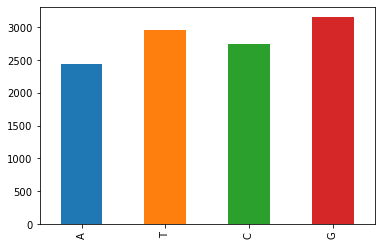

In [14]:
js1_mono_df[['A','T','C','G']].sum().plot.bar()

In [17]:
js1_bi_count = count_bi_series(js1.iloc[:,0])
js1_bi_df = pd.concat([pd.DataFrame(js1_bi_count).T, js1['MSIstatus']], axis=1)
js1_bi_df.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT,MSIstatus
deidentifiedSpecimenName,,,,,,,,,,,,,,,,,
XRN:5H19TB,6,0,13,2,2,0,1,5,12,7,15,8,2,1,12,3,MSS
XRN:67DD1N,1,4,11,4,8,6,1,5,9,6,10,8,2,4,11,2,MSS
XRN:8PFVJK,3,9,7,5,8,11,1,8,5,4,3,5,8,4,6,6,MSS
XRN:2AUNEA,4,12,7,4,7,4,1,10,9,2,4,1,7,5,4,9,MSS
XRN:L6E0XT,1,4,6,1,6,6,2,3,6,6,7,27,0,0,31,0,MSI-H


In [17]:
dt_bi = js1_bi.groupby('MSIstatus') \
    .agg('mean')
dt_bi.T

MSIstatus,MSI-H,MSS
AA+TT,4.666667,9.192661
AC+GT,16.333333,10.568807
AG+CT,14.666667,15.889908
AT+AT,10.000000,8.990826
CA+TG,22.666667,15.513761
CC+GG,12.333333,12.963303
CG+CG,3.333333,3.633028
GA+TC,12.666667,12.064220
GC+GC,12.000000,12.256881
TA+TA,6.666667,7.871560


###  two-tailed Mann Whitney U test 

In [18]:
def mean_mannwhitneyu(df):
    gb = df.groupby('MSIstatus')
    tmp = gb.agg('mean').T # compute mean
    tmp.rename(columns={"MSI-H":'MSI_mean',"MSS":'MSS_mean'}, inplace = True)
    msi = gb.get_group('MSI-H')
    mss = gb.get_group('MSS')
    p_list = []
    for i in tmp.index:
        stat, pval = stats.mannwhitneyu(msi[i], mss[i]) # compute p value
        p_list.append(pval)
    tmp['MW_2tailed_pval'] = p_list
    return tmp

In [32]:
mean_mannwhitneyu(combine_rc_table(js1_mono_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,47.333333,48.284404,0.442626
C+G,57.666667,52.568807,0.208495


In [33]:
mean_mannwhitneyu(combine_rc_table2(js1_mono_df)) # should get same result as with combine_rc_table()

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,47.333333,48.284404,0.442626
C+G,57.666667,52.568807,0.208495


In [31]:
mean_mannwhitneyu(combine_rc_percentage(js1_mono_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,0.453803,0.478503,0.291253
C+G,0.546197,0.521497,0.291253
JS_len,105.000000,100.853211,0.120156


### new way to calculate bi-nucleotides

In [19]:
combine_rc_table2(js1_bi_df).head(3) # should get differebt result as with combine_rc_table()

,AA+TT,AC+GT,AG+CT,AT,CA+TG,CC+GG,CG,GA+TC,GC,TA,MSIstatus
deidentifiedSpecimenName,,,,,,,,,,,
XRN:5H19TB,9,8,18,2,14,15,1,13,7,2,MSS
XRN:67DD1N,3,12,16,4,19,16,1,13,6,2,MSS
XRN:8PFVJK,9,14,15,5,14,14,1,9,4,8,MSS


In [27]:
combine_rc_percentage(js1_bi_df).head(3)

,AA+TT,AC+GT,AG+CT,AT,CA+TG,CC+GG,CG,GA+TC,GC,TA,MSIstatus,count
deidentifiedSpecimenName,,,,,,,,,,,,
XRN:5H19TB,0.101124,0.089888,0.202247,0.022472,0.157303,0.168539,0.011236,0.146067,0.078652,0.022472,MSS,89
XRN:67DD1N,0.032609,0.130435,0.173913,0.043478,0.206522,0.173913,0.010870,0.141304,0.065217,0.021739,MSS,92
XRN:8PFVJK,0.096774,0.150538,0.161290,0.053763,0.150538,0.150538,0.010753,0.096774,0.043011,0.086022,MSS,93


In [36]:
mean_mannwhitneyu(combine_rc_table(js1_bi_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,4.666667,9.192661,0.031333
AC+GT,16.333333,10.568807,0.341689
AG+CT,14.666667,15.889908,0.362107
AT+AT,10.000000,8.990826,0.334956
CA+TG,22.666667,15.513761,0.149026
CC+GG,12.333333,12.963303,0.362204
CG+CG,3.333333,3.633028,0.440984
GA+TC,12.666667,12.064220,0.284201
GC+GC,12.000000,12.256881,0.492749
TA+TA,6.666667,7.871560,0.354694


In [35]:
mean_mannwhitneyu(combine_rc_table2(js1_bi_df)) # should get different result as with combine_rc_table()

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,4.666667,9.192661,0.031333
AC+GT,16.333333,10.568807,0.341689
AG+CT,14.666667,15.889908,0.362107
AT,5.000000,4.495413,0.334956
CA+TG,22.666667,15.513761,0.149026
CC+GG,12.333333,12.963303,0.362204
CG,1.666667,1.816514,0.440984
GA+TC,12.666667,12.064220,0.284201
GC,6.000000,6.128440,0.492749
TA,3.333333,3.935780,0.354694


In [38]:
mean_mannwhitneyu(combine_rc_percentage(js1_bi_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,0.048231,0.099979,0.022243
AC+GT,0.159867,0.113825,0.410876
AG+CT,0.149955,0.171723,0.258227
AT+AT,0.103843,0.097097,0.407364
CA+TG,0.223821,0.166970,0.255323
CC+GG,0.124395,0.140390,0.249565
CG+CG,0.032987,0.039012,0.428156
GA+TC,0.130027,0.130382,0.329406
GC+GC,0.120526,0.132056,0.365998
TA+TA,0.070054,0.085297,0.303687


In [39]:
mean_mannwhitneyu(combine_rc_percentage2(js1_mono_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,0.453803,0.478503,0.291253
C+G,0.546197,0.521497,0.291253
count,105.000000,100.853211,0.120156


In [40]:
mean_mannwhitneyu(combine_rc_percentage2(js1_bi_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,0.048231,0.099979,0.022243
AC+GT,0.159867,0.113825,0.410876
AG+CT,0.149955,0.171723,0.258227
AT,0.051922,0.048549,0.407364
CA+TG,0.223821,0.166970,0.255323
CC+GG,0.124395,0.140390,0.249565
CG,0.016493,0.019506,0.428156
GA+TC,0.130027,0.130382,0.329406
GC,0.060263,0.066028,0.365998
TA,0.035027,0.042648,0.303687


### Check if JS2 has similar pattern

In [10]:
js2 = df[['Junction Sequence 2','MSIstatus']]
js2.index = df['deidentifiedSpecimenName']
js2 = js2.drop(js2[js2['Junction Sequence 2'] == '-'].index)  #Drop rows containing with not JS2
print(js2.shape)
js2.head(3)

(36, 2)


,Junction Sequence 2,MSIstatus
deidentifiedSpecimenName,,
XRN:TM9UPK,TGTGGTTCCTGTGCCTGTCCAGATGAGCTCTATGCCCAGAAACTGA...,MSI-H
XRN:HK7AJD,GGGCTGCAGAGGGCTGTCTGTCTGTCTGTTCTCCTGGCTTTGTTTC...,MSI-H
XRN:LKQ6FL,AAATACAAAAATTAGCCAGTTACGGTGGCACATGCCTGTAGTCCCA...,MSS


In [11]:
values, counts = np.unique(js2.MSIstatus, return_counts=True)
dict(zip(values, counts))

{'MSI-H': 2, 'MSS': 34}

In [43]:
js2_mono_count = count_mono_series(js2.iloc[:,0])
js2_mono_df = pd.concat([pd.DataFrame(js2_mono_count).T, js2['MSIstatus']], axis=1)
combine_rc_percentage(js2_mono_df).head(3)

,A+T,C+G,MSIstatus,JS_len
deidentifiedSpecimenName,,,,
XRN:TM9UPK,0.410000,0.590000,MSI-H,100
XRN:HK7AJD,0.544554,0.455446,MSI-H,101
XRN:LKQ6FL,0.610000,0.390000,MSS,100


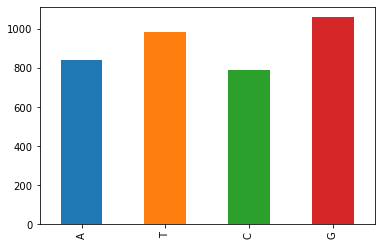

In [24]:
js2_mono_df[['A','T','C','G']].sum().plot.bar()

In [51]:
js2_bi_count = count_bi_series(js2.iloc[:,0])
js2_bi_df = pd.concat([pd.DataFrame(js2_bi_count).T, js2['MSIstatus']], axis=1)
combine_rc_percentage(js1_bi_df).head(3)

,AA+TT,AC+GT,AG+CT,AT+AT,CA+TG,CC+GG,CG+CG,GA+TC,GC+GC,TA+TA,MSIstatus,JS_len
deidentifiedSpecimenName,,,,,,,,,,,,
XRN:5H19TB,0.101124,0.089888,0.202247,0.044944,0.157303,0.168539,0.022472,0.146067,0.157303,0.044944,MSS,89
XRN:67DD1N,0.032609,0.130435,0.173913,0.086957,0.206522,0.173913,0.021739,0.141304,0.130435,0.043478,MSS,92
XRN:8PFVJK,0.096774,0.150538,0.161290,0.107527,0.150538,0.150538,0.021505,0.096774,0.086022,0.172043,MSS,93


In [44]:
mean_mannwhitneyu(combine_rc_table(js2_mono_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,48.0,50.823529,0.390761
C+G,52.5,51.323529,0.486181


In [55]:
mean_mannwhitneyu(combine_rc_table2(js2_mono_df)) # should get same result as with combine_rc_table()

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,48.0,50.823529,0.390761
C+G,52.5,51.323529,0.486181


In [49]:
mean_mannwhitneyu(combine_rc_table(js2_bi_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,7.5,9.676471,0.243411
AC+GT,13.0,12.117647,0.156104
AG+CT,18.5,15.794118,0.351200
AT+AT,6.0,9.764706,0.155037
CA+TG,16.5,16.382353,0.458447
CC+GG,9.0,11.470588,0.243340
CG+CG,5.0,3.000000,0.414619
GA+TC,12.5,11.647059,0.364403
GC+GC,14.0,11.470588,0.146683
TA+TA,9.0,9.647059,0.430734


In [60]:
mean_mannwhitneyu(combine_rc_table2(js2_bi_df)) # should get different result as with combine_rc_table()

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,7.5,9.676471,0.243411
AC+GT,13.0,12.117647,0.156104
AG+CT,18.5,15.794118,0.351200
AT,3.0,4.882353,0.155037
CA+TG,16.5,16.382353,0.458447
CC+GG,9.0,11.470588,0.243340
CG,2.5,1.500000,0.414619
GA+TC,12.5,11.647059,0.364403
GC,7.0,5.735294,0.146683
TA,4.5,4.823529,0.430734


In [52]:
mean_mannwhitneyu(combine_rc_percentage(js2_mono_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,0.477277,0.497272,0.458694
C+G,0.522723,0.502728,0.458694
JS_len,100.500000,102.147059,0.290678


In [54]:
mean_mannwhitneyu(combine_rc_percentage(js2_bi_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,0.079787,0.103496,0.213493
AC+GT,0.138298,0.126790,0.213434
AG+CT,0.196809,0.168975,0.352024
AT+AT,0.063830,0.103665,0.142162
CA+TG,0.175532,0.172500,0.486223
CC+GG,0.095745,0.123244,0.266973
CG+CG,0.053191,0.032123,0.430896
GA+TC,0.132979,0.124759,0.431444
GC+GC,0.148936,0.122665,0.158210
TA+TA,0.095745,0.102020,0.404452
